# **LA Census Data Exploration -- Household Income** 
Author: Yu-Chen Chu

Group Members: Georgie Suico, Matthews Cribioli, Alejandra Gutierrez

Description: This is the data analysis of LA county "Household Income" from American Community Survey 2017-2021 (5-year estimates)(ACS 2021), Social Explorer. The data analysis will include analyzing basic information of the dataframe and plotting, which may help proceed our final project, which is the research of the relationship between freight routes and social equity. 

Source Link: https://www.socialexplorer.com/tables/ACS2021_5yr

## Importing data

Import `pandas` and `geopandas` to the notebook for further analysis

In [3]:
import geopandas as gpd
import pandas as pd

Name the dataframe as "df" and and apply `pd.read_csv` to read the file. Apply `.head()` to see the data at the first five rows

In [13]:
df = pd.read_csv("Data/R13283028_SL140.csv")
df.head()


,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,60,85,43,149,105,146,210,134,143,90
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,0,13,0,37,200,158,126,194,168,253
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,43,55,36,189,89,134,116,60,140,112
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,111,27,97,112,32,193,207,33,108,0
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,0,86,14,35,44,96,9,81,0,32


## Preliminary inspection

Apply `.shape` to understand the number of rows and columns in the df

In [14]:
df.shape

(2498, 113)

## Overwriting default display settings 

There are too many columns which are not shown in the dataframe. Thus, I apply `pd.set_option` to display all the columns and rows

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_A14018_001,SE_A14009_001,SE_A14009_002,SE_A14009_003,SE_A14009_004,SE_A14009_005,SE_A14009_006,SE_A14009_007,SE_A14009_008,SE_A14009_009,SE_A14009_010,SE_A10026_001,SE_A10026_002,SE_A10026_003,SE_A10026_004,SE_A10026_005,SE_A10026_006,SE_A10026_007,SE_A10026_008,SE_A10026_009,SE_A10026_010,SE_A10026_011,SE_A10026_012,SE_A10026_013,SE_A10026_014,SE_A10026_015,SE_A10026_016,SE_A10026_017,SE_A10026_018,SE_A10026_019,SE_A10026_020,SE_A10026_021,SE_A10026_022,SE_A10026_023,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,3806,234,57,145,240,212,2918,130235100.0,87172.088353,84189.140271,NaN,NaN,103684.782609,NaN,104451.136364,88398.564593,96009.975062,79537.749737,1494,208,0,0,208,79,11,8,60,188,48,0,140,254,69,31,154,723,303,243,177,0,42,1494,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,4216,170,15,75,123,155,3678,184827900.0,134714.212828,118253.195489,0.0,NaN,269503.676471,NaN,101119.298246,145200.000000,107052.808989,117769.665072,1372,95,0,0,95,128,7,42,79,13,0,0,13,177,35,45,97,899,322,282,295,0,60,1372,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,3583,120,363,167,237,306,2390,117123300.0,86310.464259,69217.707006,0.0,0.0,131612.299465,NaN,69625.675676,125995.098039,87984.909457,67158.064516,1357,144,0,7,137,179,13,6,160,134,0,0,134,278,93,94,91,562,308,213,41,44,16,1357,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,3686,207,291,237,549,189,2213,89005300.0,61382.965517,55876.308540,0.0,NaN,0.000000,NaN,83718.617021,31524.242424,83246.504559,51156.052899,1450,301,0,27,274,229,0,0,229,235,0,0,235,144,21,0,123,479,173,228,78,0,62,1450,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101222,Census Tra

## Data types

Apply`.info()` to see the data types. Put `verbose=True, show_counts=True` within because the data has so many columns.

In [16]:
# look at the data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 113 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    Geo_FIPS       2498 non-null   int64  
 1    Geo_QName      2498 non-null   object 
 2    Geo_FILEID     2498 non-null   object 
 3    Geo_STUSAB     2498 non-null   object 
 4    Geo_SUMLEV     2498 non-null   int64  
 5    Geo_GEOCOMP    2498 non-null   int64  
 6    Geo_LOGRECNO   2498 non-null   int64  
 7    Geo_US         0 non-null      float64
 8    Geo_REGION     0 non-null      float64
 9    Geo_DIVISION   0 non-null      float64
 10   Geo_STATECE    0 non-null      float64
 11   Geo_STATE      2498 non-null   int64  
 12   Geo_COUNTY     2498 non-null   int64  
 13   Geo_COUSUB     0 non-null      float64
 14   Geo_PLACE      0 non-null      float64
 15   Geo_TRACT      2498 non-null   int64  
 16   Geo_BLKGRP     0 non-null      float64
 17   Geo_CONCIT     0 non-null      

## Adjust data types 

We can see that the FIPS codes in 'Geo_FIPS','Geo_STATE','Geo_COUNTY' columns lack "0" in the beginning letter since the data type is interger rather than string. Thus, I convert them to string with `dtype= {'':str,'':str,'': str}`.

In [17]:
df = pd.read_csv(
    'Data/R13283028_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

Let's check whether there is any difference among those columns with `head()`.

In [18]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_A14018_001,SE_A14009_001,SE_A14009_002,SE_A14009_003,SE_A14009_004,SE_A14009_005,SE_A14009_006,SE_A14009_007,SE_A14009_008,SE_A14009_009,SE_A14009_010,SE_A10026_001,SE_A10026_002,SE_A10026_003,SE_A10026_004,SE_A10026_005,SE_A10026_006,SE_A10026_007,SE_A10026_008,SE_A10026_009,SE_A10026_010,SE_A10026_011,SE_A10026_012,SE_A10026_013,SE_A10026_014,SE_A10026_015,SE_A10026_016,SE_A10026_017,SE_A10026_018,SE_A10026_019,SE_A10026_020,SE_A10026_021,SE_A10026_022,SE_A10026_023,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,3806,234,57,145,240,212,2918,130235100.0,87172.088353,84189.140271,NaN,NaN,103684.782609,NaN,104451.136364,88398.564593,96009.975062,79537.749737,1494,208,0,0,208,79,11,8,60,188,48,0,140,254,69,31,154,723,303,243,177,0,42,1494,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,4216,170,15,75,123,155,3678,184827900.0,134714.212828,118253.195489,0.0,NaN,269503.676471,NaN,101119.298246,145200.000000,107052.808989,117769.665072,1372,95,0,0,95,128,7,42,79,13,0,0,13,177,35,45,97,899,322,282,295,0,60,1372,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,3583,120,363,167,237,306,2390,117123300.0,86310.464259,69217.707006,0.0,0.0,131612.299465,NaN,69625.675676,125995.098039,87984.909457,67158.064516,1357,144,0,7,137,179,13,6,160,134,0,0,134,278,93,94,91,562,308,213,41,44,16,1357,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,3686,207,291,237,549,189,2213,89005300.0,61382.965517,55876.308540,0.0,NaN,0.000000,NaN,83718.617021,31524.242424,83246.504559,51156.052899,1450,301,0,27,274,229,0,0,229,235,0,0,235,144,21,0,123,479,173,228,78,0,62,1450,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US0603710

## Drop/Delete null columns

Now let's find the columns that have all empty values with`.isna().all()`.

In [19]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

Drop those columns with`.dropna`to make the dataframe cleaner and apply `.shape` to see the outcome. 

In [20]:
df = df.dropna(axis=1,how="all")
df.shape

(2498, 70)

Let's see all the columns with `.columns`.

In [21]:
df.columns

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_STATE', 'Geo_COUNTY', 'Geo_TRACT',
       'Geo_GEOID', 'Geo_NAME', 'SE_A13004_001', 'SE_A13004_002',
       'SE_A13004_003', 'SE_A13004_004', 'SE_A13004_005', 'SE_A13004_006',
       'SE_A13004_007', 'SE_A14018_001', 'SE_A14009_001', 'SE_A14009_002',
       'SE_A14009_003', 'SE_A14009_004', 'SE_A14009_005', 'SE_A14009_006',
       'SE_A14009_007', 'SE_A14009_008', 'SE_A14009_009', 'SE_A14009_010',
       'SE_A10026_001', 'SE_A10026_002', 'SE_A10026_003', 'SE_A10026_004',
       'SE_A10026_005', 'SE_A10026_006', 'SE_A10026_007', 'SE_A10026_008',
       'SE_A10026_009', 'SE_A10026_010', 'SE_A10026_011', 'SE_A10026_012',
       'SE_A10026_013', 'SE_A10026_014', 'SE_A10026_015', 'SE_A10026_016',
       'SE_A10026_017', 'SE_A10026_018', 'SE_A10026_019', 'SE_A10026_020',
       'SE_A10026_021', 'SE_A10026_022', 'SE_A10026_023', 'SE_A14001_001',
       'SE_A14001_002', 'SE_A140

Now I have to define columns I want to keep. From the txt.file, we know that 'SE_A14001_002' to 'SE_A14001_017' are the annual income.
 
 5. Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      A14001
         Variables:
            A14001_001:   Households:
            A14001_002:      Less than $10,000
            A14001_003:      $10,000 to $14,999
            A14001_004:      $15,000 to $19,999
            A14001_005:      $20,000 to $24,999
            A14001_006:      $25,000 to $29,999
            A14001_007:      $30,000 to $34,999
            A14001_008:      $35,000 to $39,999
            A14001_009:      $40,000 to $44,999
            A14001_010:      $45,000 to $49,999
            A14001_011:      $50,000 to $59,999
            A14001_012:      $60,000 to $74,999
            A14001_013:      $75,000 to $99,999
            A14001_014:      $100,000 to $124,999
            A14001_015:      $125,000 to $149,999
            A14001_016:      $150,000 to $199,999
            A14001_017:      $200,000 or More

## Define and Rename columns

Define columns to keep

In [22]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

Add it to a new dataframe

In [23]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   SE_A14001_002  2498 non-null   int64 
 2   SE_A14001_003  2498 non-null   int64 
 3   SE_A14001_004  2498 non-null   int64 
 4   SE_A14001_005  2498 non-null   int64 
 5   SE_A14001_006  2498 non-null   int64 
 6   SE_A14001_007  2498 non-null   int64 
 7   SE_A14001_008  2498 non-null   int64 
 8   SE_A14001_009  2498 non-null   int64 
 9   SE_A14001_010  2498 non-null   int64 
 10  SE_A14001_011  2498 non-null   int64 
 11  SE_A14001_012  2498 non-null   int64 
 12  SE_A14001_013  2498 non-null   int64 
 13  SE_A14001_014  2498 non-null   int64 
 14  SE_A14001_015  2498 non-null   int64 
 15  SE_A14001_016  2498 non-null   int64 
 16  SE_A14001_017  2498 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 331.9+ KB


Now rename the columns. First, create a list of column names as they are now.

In [24]:
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

Replace the values with your desired column names.

In [25]:
df2.columns = ['FIPS',
'< $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'>$200,000']


Take a look at our new dataframe.

In [26]:
df2.sample(5)

,FIPS,"< $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999",">$200,000"
1551,06037482001,28,18,94,9,13,13,36,8,28,54,44,130,53,107,108,184
1627,06037503601,23,42,31,8,27,23,77,38,52,54,31,205,166,94,174,164
605,06037207901,403,92,0,102,86,0,0,0,51,87,82,195,156,60,288,191
1158,06037310705,125,285,99,56,56,54,15,61,30,33,201,80,111,40,89,33
1618,06037503106,56,40,25,13,18,53,0,112,77,85,58,222,101,63,168,85


It seems like there is no total population of each classification. Let's create one! First, I define a new dataframe with the original columns. 

In [27]:
df3 = ['< $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'>$200,000']

## Add columns 

Then, I sum the rows up to make a new column 'TotalPop' and add it to the dataframe with`.sum(axis = 1)`

In [28]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_78/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"< $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999",">$200,000",TotalPop
0,06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90,1494
1,06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253,1372
2,06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112,1357


Here I want to know the percentage of household fall below poverty level. First, I want to know the average household size.

In [26]:
df3 = pd.read_csv("Data/R13283899_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(3)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A10003_001,SE_A10002B_001,SE_A10002B_002,SE_A10002B_003,SE_A10002B_004,SE_A10002B_005,SE_A10002B_006,SE_A10002B_007,SE_A10002B_008,ACS21_5yr_B25009001,ACS21_5yr_B25009002,ACS21_5yr_B25009003,ACS21_5yr_B25009004,ACS21_5yr_B25009005,ACS21_5yr_B25009006,ACS21_5yr_B25009007,ACS21_5yr_B25009008,ACS21_5yr_B25009009,ACS21_5yr_B25009010,ACS21_5yr_B25009011,ACS21_5yr_B25009012,ACS21_5yr_B25009013,ACS21_5yr_B25009014,ACS21_5yr_B25009015,ACS21_5yr_B25009016,ACS21_5yr_B25009017,ACS21_5yr_B25009001s,ACS21_5yr_B25009002s,ACS21_5yr_B25009003s,ACS21_5yr_B25009004s,ACS21_5yr_B25009005s,ACS21_5yr_B25009006s,ACS21_5yr_B25009007s,ACS21_5yr_B25009008s,ACS21_5yr_B25009009s,ACS21_5yr_B25009010s,ACS21_5yr_B25009011s,ACS21_5yr_B25009012s,ACS21_5yr_B25009013s,ACS21_5yr_B25009014s,ACS21_5yr_B25009015s,ACS21_5yr_B25009016s,ACS21_5yr_B25009017s,ACS21_5yr_B19019001,ACS21_5yr_B19019002,ACS21_5yr_B19019003,ACS21_5yr_B19019004,ACS21_5yr_B19019005,ACS21_5yr_B19019006,ACS21_5yr_B19019007,ACS21_5yr_B19019008,ACS21_5yr_B19019001s,ACS21_5yr_B19019002s,ACS21_5yr_B19019003s,ACS21_5yr_B19019004s,ACS21_5yr_B19019005s,ACS21_5yr_B19019006s,ACS21_5yr_B19019007s,ACS21_5yr_B19019008s,ACS21_5yr_B25010001,ACS21_5yr_B25010002,ACS21_5yr_B25010003,ACS21_5yr_B25010001s,ACS21_5yr_B25010002s,ACS21_5yr_B25010003s
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,2.54,644,200,234,86,97,21,6,0,1494,850,135,238,329,108,35,5,0,644,200,234,86,97,21,6,0,74.54546,81.21212,39.39394,50.90909,67.27273,43.63636,26.666670,5.454545,7.878788,72.72727,49.09091,50.30303,39.39394,33.33333,20.00000,7.272727,7.878788,68529.0,30625.0,92500.0,57271.0,98839.0,188125.0,NaN,NaN,17158.181818,13578.181818,28305.454545,21747.272727,16249.090909,73952.727273,NaN,NaN,2.54,2.66,2.38,0.127273,0.133333,0.206061
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,3.09,344,116,43,48,36,24,77,0,1372,1028,173,359,147,252,8,60,29,344,116,43,48,36,24,77,0,101.21210,61.21212,45.45454,51.51515,43.63636,48.48485,7.878788,30.909090,24.242420,106.66670,66.06061,27.87879,28.48485,26.66667,23.63636,72.121220,7.878788,108198.0,50417.0,130769.0,NaN,107222.0,NaN,135601.0,NaN,15108.484848,28315.757576,13844.242424,NaN,52390.909091,NaN,24092.121212,NaN,3.09,3.04,3.24,0.248485,0.200000,0.800000
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,2.64,762,261,256,71,63,80,14,17,1357,595,171,145,120,92,56,11,0,762,261,256,71,63,80,14,17,121.81820,101.81820,92.12122,39.39394,35.75758,33.93939,22.424240,10.303030,7.878788,96.96970,46.06061,80.60606,29.09091,30.30303,40.00000,12.727270,15.757580,59119.0,37500.0,58958.0,86083.0,79688.0,90441.0,NaN,NaN,5581.818182,12576.969697,4719.393939,31000.606061,38788.484848,18956.363636,NaN,NaN

Select the column represents the average household size

In [27]:
df_householdsize = df3['SE_A10003_001']
df_householdsize.sample(10)

24      4.66
2179    1.97
2395    3.58
625     2.51
1289    4.14
1345    3.29
1910    2.90
2091    4.25
638     2.63
2387    3.88
Name: SE_A10003_001, dtype: float64

Let's see the basic info of the household size 

In [28]:
df_householdsize.describe()

count    2469.000000
mean        3.058429
std         0.769966
min         1.050000
25%         2.530000
50%         3.010000
75%         3.590000
max         7.760000
Name: SE_A10003_001, dtype: float64

The mean and the median household size roughly fall on 3. To make the analysis easier, I use 3 as average household size to proceed the analysis of poverty percentage. According to the U.S. Department of Health and Human Services (HHS), Federal Poverty Level of a household of 3 in Los Angeles, 2022 is $23,030. The category closest to $23,030 is $20,000−$24,999.  Thus, we use $20,000−$24,999 as a threshold to see the percentage of poverty in each census tract. 

Source: https://www.laalmanac.com/social/so24.php

Let's create a new column called "poverty"

In [33]:
df2['poverty'] = df2['< $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_552/214817986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['< $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"< $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999",">$200,000",TotalPop,poverty
237,06037127220,85,185,84,88,103,70,132,95,49,80,196,106,86,65,108,149,1681,442
2005,06037574500,65,27,49,48,55,32,0,30,34,55,143,445,139,149,362,633,2266,189
2071,06037600702,54,77,20,43,4,67,56,85,70,82,30,188,184,224,152,201,1537,194
1465,06037460900,92,9,68,127,78,22,32,7,39,83,278,303,257,141,192,182,1910,296
561,06037203710,44,23,36,33,39,22,42,48,16,51,137,115,92,49,51,34,832,136


Then, create a new column 'pct_poverty', which divides 'poverty' by 'TotalPop'

In [65]:
df2['pct_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(5)

/tmp/ipykernel_552/2022362464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pct_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"< $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999",">$200,000",TotalPop,poverty,pct_poverty
2282,06037703200,72,29,33,153,0,27,90,33,69,110,309,256,366,178,196,272,2193,287,13.087095
1778,06037540800,65,130,27,0,65,24,17,45,92,72,221,168,147,190,60,133,1456,222,15.247253
1559,06037482304,108,31,47,11,61,19,64,44,49,75,59,96,47,45,27,0,783,197,25.159642
1895,06037553901,19,45,39,97,69,27,110,30,19,126,132,438,113,124,117,43,1548,200,12.919897
1904,06037554204,116,115,208,51,83,168,91,55,52,141,282,141,148,30,116,13,1810,490,27.071823


## Simple plots

Let's make some plots! First, plot 'pct_poverty' as a historgram with 50 bins.

<AxesSubplot: ylabel='Frequency'>

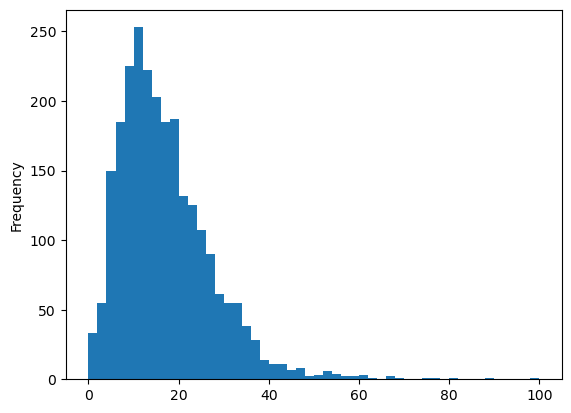

In [66]:
df2['pct_poverty'].plot.hist(bins=50)

Let's see the plotbox now.

<AxesSubplot: >

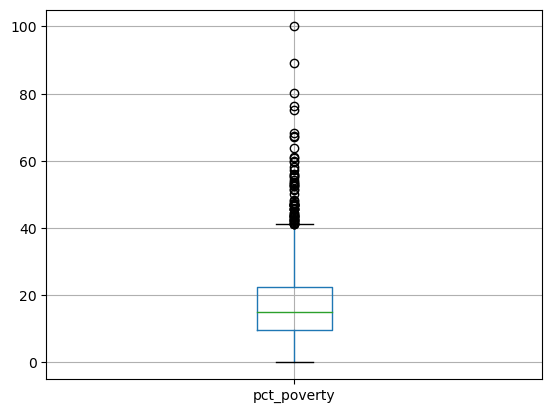

In [67]:
df2.boxplot(column=['pct_poverty'])

What are the top ten poorest cencus tracts in LA? Use `.sort_values` to find the answer

In [68]:
df_sorted = df2.sort_values(by='pct_poverty',ascending = False)
df_sorted[['FIPS','pct_poverty']].head(10)

,FIPS,pct_poverty
2488,06037980033,100.000000
588,06037206301,89.275635
589,06037206302,80.190174
590,06037206303,76.470588
2469,06037980011,75.000000
2475,06037980017,68.421053
771,06037224702,67.293777
595,06037207304,67.005380
598,06037207307,63.910422
942,06037265307,61.126761


Plot it

<AxesSubplot: xlabel='FIPS'>

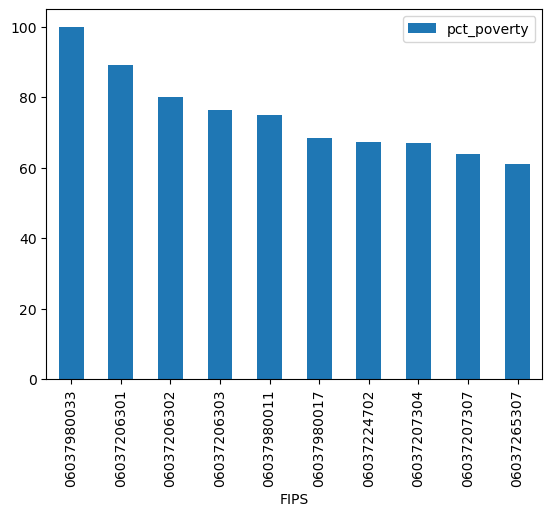

In [69]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='pct_poverty')

Make it prettier with a title

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Poorest Population in Los Angeles County in from 2017-2021'}, ylabel='FIPS'>

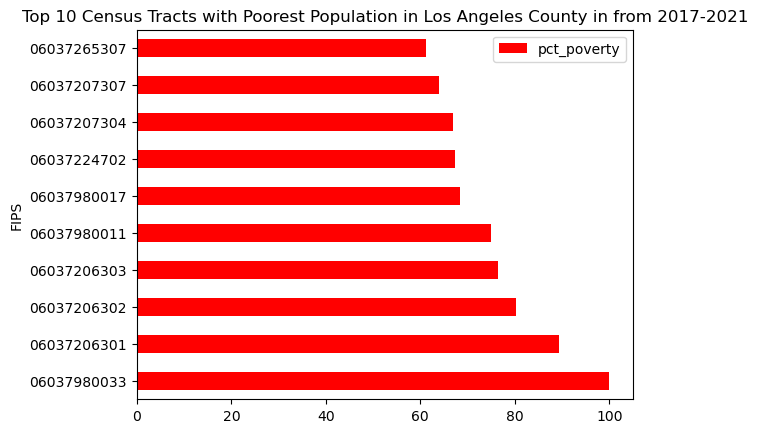

In [70]:
df_sorted.head(10).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='pct_poverty', 
                            title='Top 10 Census Tracts with Poorest Population in Los Angeles County in from 2017-2021',
                            color='red')

## Filtering and subsetting data

Let's filter the data which total population = 0

In [71]:
df_nopop = df2[df2['TotalPop']== 0]
df_nopop

,FIPS,"< $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999",">$200,000",TotalPop,poverty,pct_poverty
938,06037265301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2058,06037578100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2334,06037901003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2439,06037920200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2459,06037980001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2460,06037980002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2461,06037980003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2462,06037980004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2463,06037980005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2464,06037980006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [72]:
print(f'There are {len(df_nopop)} census tracts with no people in them')

There are 27 census tracts with no people in them


In [73]:
df_nopop[['FIPS','TotalPop']]

,FIPS,TotalPop
938,06037265301,0
2058,06037578100,0
2334,06037901003,0
2439,06037920200,0
2459,06037980001,0
2460,06037980002,0
2461,06037980003,0
2462,06037980004,0
2463,06037980005,0
2464,06037980006,0


## Simple Maps

Read in a geojson file from week 3 course, which was downloaded from the LA Times

In [5]:
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


plot it

<AxesSubplot: >

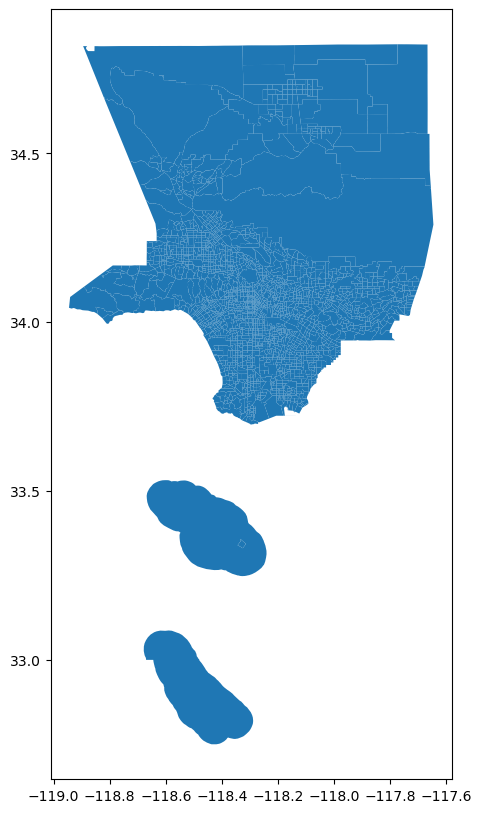

In [6]:
tracts.plot(figsize=(12,10))

we only really need FIPS and geometry, so let's subset the data

In [7]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


create a FIPS column

In [8]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


## Merging/joining data 
Now merging/joining data using column 'FIPS' to make the two dataframes merge together.

In [29]:
# create a new dataframe based on the join
tracts_income = tracts.merge(df2,on="FIPS")
tracts_income.head(3)

,CT20,geometry,FIPS,"< $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999",">$200,000",TotalPop
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90,1494
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253,1372
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112,1357


Now create choropleth maps in geopandas. There are three breaks, which are 'natural_breaks', 'equal_interval', 'quantiles'.
Let's try each of them.

<AxesSubplot: >

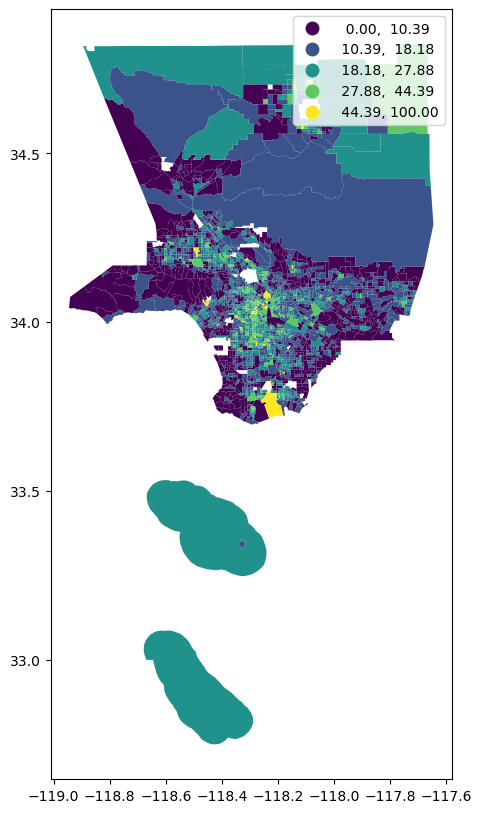

In [60]:
# scheme='NaturalBreaks'
tracts_income.plot(figsize=(12,10),
                 column='pct_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

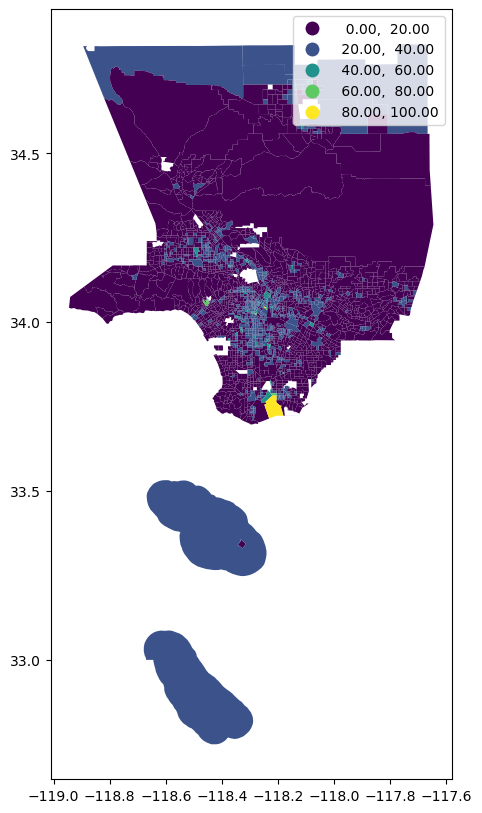

In [61]:
# scheme='equal_interval'
tracts_income.plot(figsize=(12,10),
                 column='pct_poverty',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

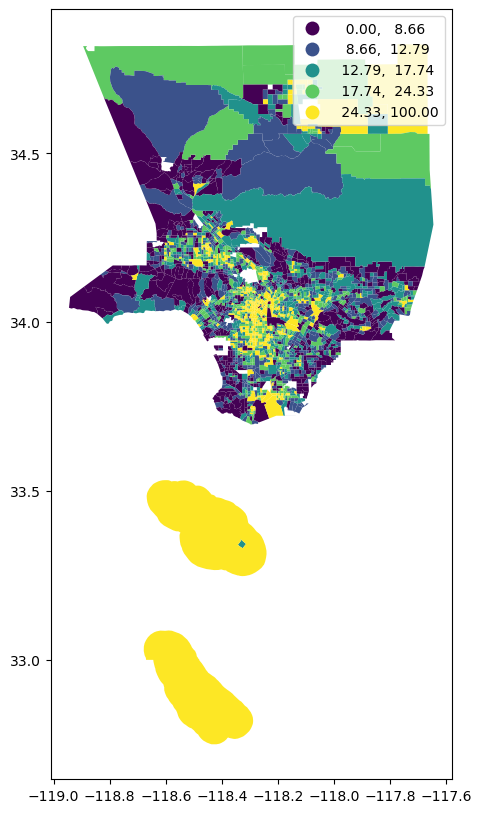

In [62]:
# scheme='quantiles'
tracts_income.plot(figsize=(12,10),
                 column='pct_poverty',
                 legend=True, 
                 scheme='quantiles')

This is the prelimary analysis of LA household income. Thanks!